In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat May 20 15:37:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    44W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import pickle 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
X_face = pickle.load(open("/content/drive/MyDrive/image_processed/X_face_300.pickle","rb"))
y_face = pickle.load(open("/content/drive/MyDrive/image_processed/y_face_300.pickle","rb"))
print(X_face.shape,y_face.shape)

X_palm = pickle.load(open("/content/drive/MyDrive/image_processed/X_palm_300.pickle","rb"))
y_palm = pickle.load(open("/content/drive/MyDrive/image_processed/y_palm_300.pickle","rb"))
print(X_palm.shape,y_palm.shape)

X_eye = pickle.load(open("/content/drive/MyDrive/image_processed/X_eye_300.pickle","rb"))
y_eye = pickle.load(open("/content/drive/MyDrive/image_processed/y_eye_300.pickle","rb"))
print(X_eye.shape,y_eye.shape)

(1500, 128, 128, 3) (1500, 1)
(1500, 256, 128, 3) (1500, 1)
(1500, 256, 128, 3) (1500, 1)


In [6]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img,img_to_array, load_img
from skimage.util import random_noise

def add_sp_noise(img,amt):
    image = random_noise(img, mode = 's&p',amount = amt)
    image = image *255
    image = image.astype('uint8')
    return image

def gaussian_noise(img,amt):
    image = random_noise(img, mode = 'gaussian',mean=0,var=amt)
    image = image*255
    image = image.astype('uint8')
    return image

datagen_train = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.4,
                zoom_range=0.4,
                horizontal_flip=True,
                fill_mode='nearest')

datagen_validation = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest'
                )

datagen_test = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest'
                )

15000
15000
3000
3000


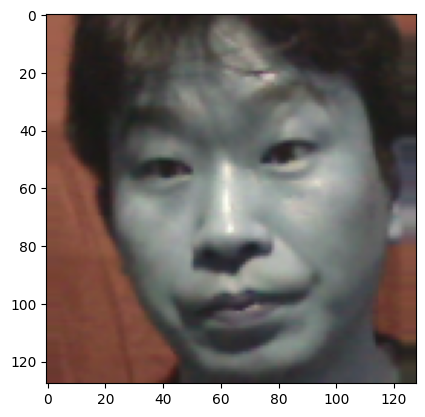

In [7]:
# face processing #
face_train_dataset = []
face_train_label = []

k=0
for i,image in enumerate(X_face):
    x = image.reshape((1,) + image.shape)
    #print(i)
    k=0
    for batch in datagen_train.flow(x,batch_size=1):
        face_train_dataset.append(batch[0])
        face_train_label.append(y_face[i][0]) #append clean pic
        
        k+=1
        if k>=10:
            break
            
print(len(face_train_dataset))
print(len(face_train_label))
plt.imshow(face_train_dataset[0])
########################################################################
face_vt_dataset = []
face_vt_label = []

k=0
for i,image in enumerate(X_face):
    x = image.reshape((1,) + image.shape)
    #print(i)
    k=0
    for batch in datagen_validation.flow(x,batch_size=1):
        face_vt_dataset.append(batch[0])
        face_vt_label.append(y_face[i][0]) #append clean test pic
        
        k+=1
        if k>=2:
            break

print(len(face_vt_dataset))
print(len(face_vt_label))
plt.imshow(face_vt_dataset[0])

In [8]:
face_train = np.array(face_train_dataset)
label_train = np.array(face_train_label).reshape(-1,1)
print(face_train.shape)
print(label_train.shape)

face_vt = np.array(face_vt_dataset)
label_vt = np.array(face_vt_label).reshape(-1,1)
print(face_vt.shape)
print(label_vt.shape)

(15000, 128, 128, 3)
(15000, 1)
(3000, 128, 128, 3)
(3000, 1)


15000
15000
3000
3000


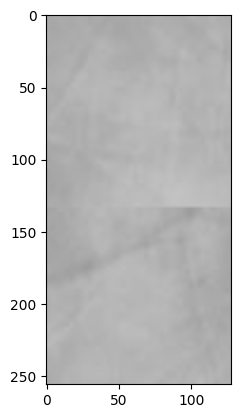

In [9]:
# palm processing #

palm_train_dataset = []
palm_train_label  = []

k=0
for i,image in enumerate(X_palm):
    x = image.reshape((1,) + image.shape)
    #print(i)
    k=0
    for batch in datagen_train.flow(x,batch_size=1):
        palm_train_dataset.append(batch[0]) #append clean pic
        palm_train_label.append(y_palm[i][0])
        
        k+=1
        if k>=10:
            break
            
print(len(palm_train_dataset))
print(len(palm_train_label))
plt.imshow(palm_train_dataset[0])
#################################################################   
palm_vt_dataset = []
palm_vt_label = []

k=0
for i,image in enumerate(X_palm):
    x = image.reshape((1,) + image.shape)
    #print(i)
    k=0
    for batch in datagen_validation.flow(x,batch_size=1):
        palm_vt_dataset.append(batch[0])
        palm_vt_label.append(y_palm[i][0]) #append clean test pic
        
        k+=1
        if k>=2:
            break 

print(len(palm_vt_dataset))
print(len(palm_vt_label))
plt.imshow(palm_vt_dataset[0])

In [10]:
palm_train = np.array(palm_train_dataset)
palm_train_label = np.array(palm_train_label).reshape(-1,1)
print(palm_train.shape)
print(palm_train_label.shape)

palm_vt = np.array(palm_vt_dataset)
palm_vt_label = np.array(palm_vt_label).reshape(-1,1)
print(palm_vt.shape)
print(palm_vt_label.shape)

(15000, 256, 128, 3)
(15000, 1)
(3000, 256, 128, 3)
(3000, 1)


15000
15000
3000
3000


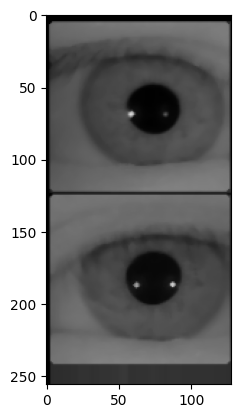

In [11]:
# eye processing #
eye_train_dataset = []
eye_train_label = []

k=0
for i,image in enumerate(X_eye):
    x = image.reshape((1,) + image.shape)
    #print(i)
    k=0
    for batch in datagen_train.flow(x,batch_size=1):
        eye_train_dataset.append(batch[0])
        eye_train_label.append(y_eye[i][0]) #append clean pic

        k+=1
        if k>=10:
            break
            
print(len(eye_train_dataset))
print(len(eye_train_label))
plt.imshow(eye_train_dataset[0])
###################################################################
eye_vt_dataset = []
eye_vt_label = []

k=0
for i,image in enumerate(X_eye):
    x = image.reshape((1,) + image.shape)
    #print(i)
    k=0
    for batch in datagen_validation.flow(x,batch_size=1):
        eye_vt_dataset.append(batch[0])
        eye_vt_label.append(y_eye[i][0]) # append clean test pic
        
        k+=1
        if k>=2:
            break

print(len(eye_vt_dataset))
print(len(eye_vt_label))
plt.imshow(eye_vt_dataset[0])

In [12]:
eye_train = np.array(eye_train_dataset)
eye_train_label = np.array(eye_train_label).reshape(-1,1)
print(eye_train.shape)
print(eye_train_label.shape)

eye_vt = np.array(eye_vt_dataset)
eye_vt_label = np.array(eye_vt_label).reshape(-1,1)
print(eye_vt.shape)
print(eye_vt_label.shape)

(15000, 256, 128, 3)
(15000, 1)
(3000, 256, 128, 3)
(3000, 1)


In [13]:
from sklearn.model_selection import train_test_split
x_valid_face,X_test_face,y_valid_face,y_test_face = train_test_split(face_vt,label_vt,
                                                                     test_size=0.5,random_state=42, 
                                                                     stratify=label_vt)

x_valid_palm,X_test_palm,y_valid_palm,y_test_palm = train_test_split(palm_vt,palm_vt_label,
                                                                     test_size=0.5,random_state=42, 
                                                                     stratify=palm_vt_label)

x_valid_eye,X_test_eye,y_valid_eye,y_test_eye = train_test_split(eye_vt,eye_vt_label,
                                                                     test_size=0.5,random_state=42, 
                                                                     stratify=eye_vt_label)

In [14]:
print(x_valid_eye.shape)
print(x_valid_face.shape)
print(x_valid_palm.shape)

print(X_test_eye.shape)
print(X_test_face.shape)
print(X_test_palm.shape)

print(y_valid_eye.shape)
print(y_valid_face.shape)
print(y_valid_palm.shape)

print(y_test_eye.shape)
print(y_test_face.shape)
print(y_test_palm.shape)

(1500, 256, 128, 3)
(1500, 128, 128, 3)
(1500, 256, 128, 3)
(1500, 256, 128, 3)
(1500, 128, 128, 3)
(1500, 256, 128, 3)
(1500, 1)
(1500, 1)
(1500, 1)
(1500, 1)
(1500, 1)
(1500, 1)


In [15]:
from keras.layers import *
from keras.models import Model, Sequential
from keras.preprocessing import image

from tensorflow.keras.callbacks import EarlyStopping

In [16]:
image_size1 = [128,128] #face
image_size2 = [256,128] #iris, palm

In [17]:
# face model #

resnet = tf.keras.applications.ResNet101V2(
         include_top=False,
         weights="imagenet",
         input_shape=image_size1 + [3],
)

for layer in resnet.layers:
    layer.trainable = False
    
x_face = Flatten()(resnet.output)

171317808/171317808 [==============================] - 8s 0us/step


In [18]:
# palm model #

InceptionResNetV2 = tf.keras.applications.InceptionResNetV2(
        include_top=False,
        weights="imagenet",
        input_shape= image_size2 + [3],
)

for layer in InceptionResNetV2.layers:
    layer.trainable = False
    
x_palm = Flatten()(InceptionResNetV2.output)

#InceptionResNetV2.summary()

219055592/219055592 [==============================] - 10s 0us/step


In [19]:
# eye model #

VGG16 = tf.keras.applications.VGG16(
              include_top=False,
              weights="imagenet",
              input_shape=image_size2 +[3],
)

for layer in VGG16.layers:
    layer.trainable = False
    
x_eye = Flatten()(VGG16.output)

58889256/58889256 [==============================] - 4s 0us/step


In [20]:
# concat all three model outputs #
combined = concatenate([x_face,x_palm,x_eye], axis = 1 )



In [21]:
#VGG16.summary()

In [22]:
#resnet.summary()

In [23]:
z = Dense(300,activation='softmax')(combined)
model = Model(inputs=[resnet.input, InceptionResNetV2.input, VGG16.input],
              outputs=z)

In [24]:
from tensorflow.keras.utils import plot_model
#from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True)

Output hidden; open in https://colab.research.google.com to view.

In [25]:
early_stopping = tf.keras.callbacks.EarlyStopping(
                monitor="val_loss",
                min_delta=0.0001,
                patience=20,
                verbose=1,
                mode="auto",
                baseline=None,
                restore_best_weights=True,
                )

opt = tf.keras.optimizers.Adam(
    learning_rate=0.0001,
)


model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [26]:
import time

st =  time.time()

history = model.fit(
    [face_train, palm_train,eye_train], 
    label_train,
    epochs=100,
    batch_size = 64,
    validation_data=([x_valid_face, x_valid_palm, x_valid_eye], y_valid_eye),
    callbacks=early_stopping
)

et =  time.time()
elapsed_time = et - st
print('training time = ', elapsed_time, ' seconds')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


235/235 [==============================] - 58s 137ms/step - loss: 6.7655 - accuracy: 0.5921 - val_loss: 0.8460 - val_accuracy: 0.9113
Epoch 2/100
235/235 [==============================] - 22s 93ms/step - loss: 0.6079 - accuracy: 0.9287 - val_loss: 0.7865 - val_accuracy: 0.9227
Epoch 3/100
235/235 [==============================] - 22s 94ms/step - loss: 0.5545 - accuracy: 0.9466 - val_loss: 0.3510 - val_accuracy: 0.9593
Epoch 4/100
235/235 [==============================] - 21s 90ms/step - loss: 0.4845 - accuracy: 0.9566 - val_loss: 1.0588 - val_accuracy: 0.9087
Epoch 5/100
235/235 [==============================] - 21s 91ms/step - loss: 0.5211 - accuracy: 0.9566 - val_loss: 0.5676 - val_accuracy: 0.9480
Epoch 6/100
235/235 [==============================] - 21s 91ms/step - loss: 0.4026 - accuracy: 0.9654 - val_loss: 0.5588 - val_accuracy: 0.9527
Epoch 7/100
235/235 [==============================] - 21s 91ms/step - loss: 0.4907 - accuracy: 0.9659 - val_loss: 0.4417 - val_accuracy: 0.9

# Model Evaluation


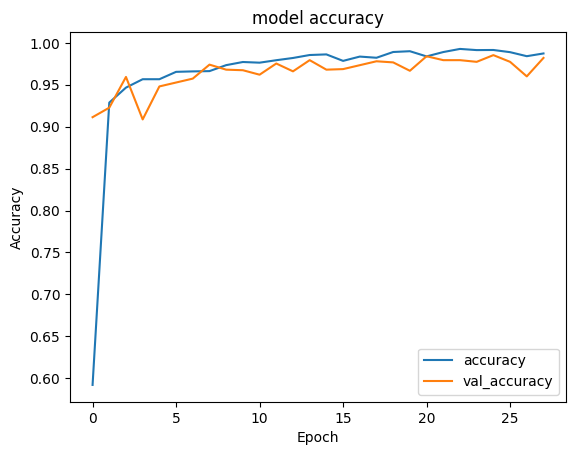

In [27]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title("model accuracy")
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
#plt.ylim
plt.legend(loc='lower right')

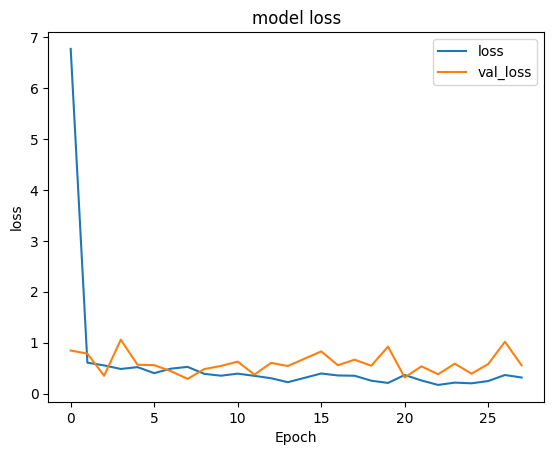

In [28]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title("model loss")
plt.xlabel("Epoch")
plt.ylabel('loss')
#plt.ylim
plt.legend(loc='upper right')

In [29]:
test_loss,test_acc = model.evaluate([X_test_face, X_test_palm, X_test_eye], y_test_eye, verbose=2)
print(test_acc)
print(test_loss)

47/47 - 4s - loss: 0.4030 - accuracy: 0.9693 - 4s/epoch - 75ms/step
0.9693333506584167
0.4029619097709656


In [31]:
# save the model trained
os.chdir('/content/drive/MyDrive/image_processed')

model.save('300_model.h5')

In [18]:
from tensorflow.keras.models import load_model
os.chdir('/content/drive/MyDrive/image_processed')
loaded_model = load_model('300_model.h5')

In [19]:
model = loaded_model

In [37]:
test_loss,test_acc = model.evaluate([X_test_face, X_test_palm, X_test_eye], y_test_eye, verbose=2)
print(test_acc)
print(test_loss)

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 - 8s - loss: 0.3812 - accuracy: 0.9760 - 8s/epoch - 167ms/step
0.9760000109672546
0.381161093711853


In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

In [21]:
y_pred = model.predict([X_test_face, X_test_palm, X_test_eye])  # Replace X_test with your test data
#y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels if needed
print(y_pred)

47/47 [==============================] - 17s 71ms/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
y_pred_proba = y_pred

In [23]:
testing_ypred = np.argmax(y_pred, axis=1)
print(testing_ypred)

[217 222 170 ...   1  44  94]


In [24]:
print(y_test_eye.shape)
print(testing_ypred.shape)

(1500, 1)
(1500,)


In [25]:
testing_ypred = testing_ypred.reshape(-1,1)
print(testing_ypred)

[[217]
 [222]
 [170]
 ...
 [  1]
 [ 44]
 [ 94]]


In [26]:
print(y_test_eye==testing_ypred)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]


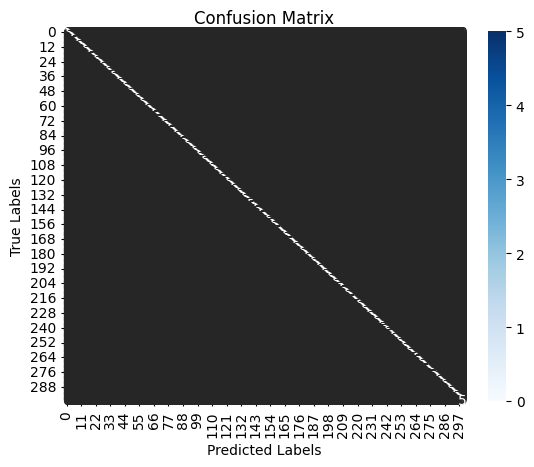

In [27]:
cm = confusion_matrix(y_test_eye, testing_ypred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Compute precision and recall
precision = precision_score(y_test_eye, testing_ypred, average='weighted')
recall = recall_score(y_test_eye, testing_ypred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9799867724867724
Recall: 0.976


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


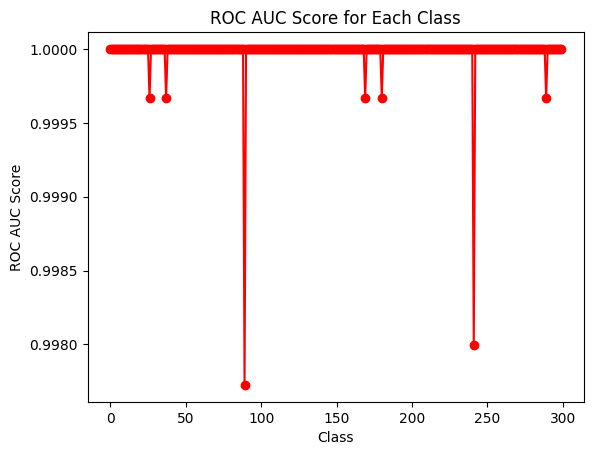

Average ROC AUC Score: 0.9999801560758083


In [29]:
from sklearn.metrics import roc_auc_score

# Assuming y_test and y_pred_proba are your true labels and predicted probabilities for the test data
num_classes=300
# Calculate the ROC AUC scores for each class
roc_auc_scores = []
for class_idx in range(num_classes):
    y_true_class = (y_test_eye == class_idx).astype(int)  # Create binary labels for the current class
    y_pred_proba_class = y_pred_proba[:, class_idx]  # Get predicted probabilities for the current class
    roc_auc = roc_auc_score(y_true_class, y_pred_proba_class)
    roc_auc_scores.append(roc_auc)

# Calculate the average ROC AUC score
average_roc_auc = np.mean(roc_auc_scores)

# Plot the average ROC AUC score
plt.figure()
plt.plot(range(num_classes), roc_auc_scores, 'ro-')
plt.xlabel('Class')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score for Each Class')
plt.show()

# Print the average ROC AUC score
print("Average ROC AUC Score:", average_roc_auc)

In [30]:
roc_auc_score(y_test_eye,y_pred_proba,multi_class="ovr")

0.9999801560758083

In [31]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y_test_eye)
y=label_encoder.transform(y_test_eye)
classes=label_encoder.classes_

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


300


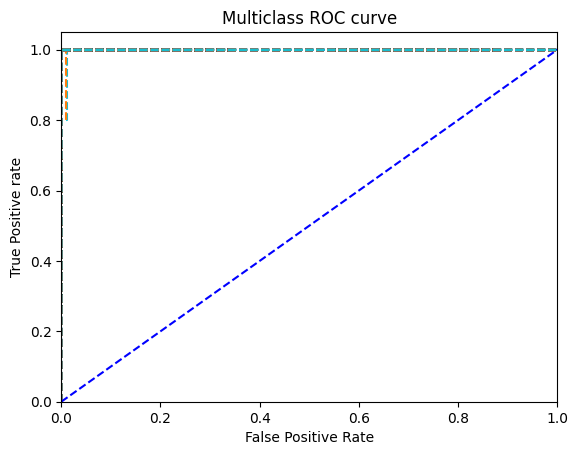

In [33]:

#binarize the y_values

y_test_binarized=label_binarize(y_test_eye,classes=np.unique(y_test_eye))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 300
print(n_class)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
#plt.legend(loc='lower right')
plt.show()

In [34]:
# Assuming you have the predicted labels (testing_ypred) and true labels (y_true) for a multi-class model

# Calculate the confusion matrix
cm = confusion_matrix(y_test_eye, testing_ypred)

num_classes = len(np.unique(y_test_eye))

sensitivity_scores = []
specificity_scores = []
far_scores = []
frr_scores = []

for class_idx in range(num_classes):
    # Extract the true positives, true negatives, false positives, and false negatives for the current class
    TP = cm[class_idx, class_idx]
    TN = np.sum(np.delete(np.delete(cm, class_idx, axis=0), class_idx, axis=1))
    FP = np.sum(cm[:, class_idx]) - TP
    FN = np.sum(cm[class_idx, :]) - TP

    # Calculate sensitivity (true positive rate) and specificity for the current class
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    # Calculate FAR (False Acceptance Rate) and FRR (False Rejection Rate) for the current class
    FAR = FP / (FP + TN)
    FRR = FN / (FN + TP)    

    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)

    far_scores.append(FAR)
    frr_scores.append(FRR)

# Calculate average sensitivity and specificity across all classes
average_sensitivity = np.mean(sensitivity_scores)
average_specificity = np.mean(specificity_scores)

# Calculate average FAR and FRR
average_far = np.mean(far_scores)
average_frr = np.mean(frr_scores)

# Print sensitivity and specificity for each class
for class_idx in range(num_classes):
    print(f"Class {class_idx}: Sensitivity = {sensitivity_scores[class_idx]}, Specificity = {specificity_scores[class_idx]}")
    print(f"Class {class_idx}: FAR = {far_scores[class_idx]}, FRR = {frr_scores[class_idx]}")

# Print average sensitivity and specificity
print(f"Average Sensitivity: {average_sensitivity}")
print(f"Average Specificity: {average_specificity}")

# Print average FAR and FRR
print("Average FAR:", average_far)
print("Average FRR:", average_frr)


Class 0: Sensitivity = 1.0, Specificity = 1.0
Class 0: FAR = 0.0, FRR = 0.0
Class 1: Sensitivity = 1.0, Specificity = 0.9993311036789297
Class 1: FAR = 0.0006688963210702341, FRR = 0.0
Class 2: Sensitivity = 1.0, Specificity = 1.0
Class 2: FAR = 0.0, FRR = 0.0
Class 3: Sensitivity = 1.0, Specificity = 1.0
Class 3: FAR = 0.0, FRR = 0.0
Class 4: Sensitivity = 1.0, Specificity = 1.0
Class 4: FAR = 0.0, FRR = 0.0
Class 5: Sensitivity = 1.0, Specificity = 1.0
Class 5: FAR = 0.0, FRR = 0.0
Class 6: Sensitivity = 1.0, Specificity = 1.0
Class 6: FAR = 0.0, FRR = 0.0
Class 7: Sensitivity = 0.8, Specificity = 1.0
Class 7: FAR = 0.0, FRR = 0.2
Class 8: Sensitivity = 1.0, Specificity = 0.9993311036789297
Class 8: FAR = 0.0006688963210702341, FRR = 0.0
Class 9: Sensitivity = 1.0, Specificity = 1.0
Class 9: FAR = 0.0, FRR = 0.0
Class 10: Sensitivity = 1.0, Specificity = 1.0
Class 10: FAR = 0.0, FRR = 0.0
Class 11: Sensitivity = 1.0, Specificity = 1.0
Class 11: FAR = 0.0, FRR = 0.0
Class 12: Sensitiv

In [35]:
# Assuming you have the predicted probabilities (y_pred_proba) and true labels (y_true) for a multi-class model

# Calculate the confusion matrix
cm = confusion_matrix(y_test_eye, testing_ypred)

num_classes = len(np.unique(y_test_eye))

tpr_scores = []
fpr_scores = []

for class_idx in range(num_classes):
    # Extract the true positives, true negatives, false positives, and false negatives for the current class
    TP = cm[class_idx, class_idx]
    TN = np.sum(np.delete(np.delete(cm, class_idx, axis=0), class_idx, axis=1))
    FP = np.sum(cm[:, class_idx]) - TP
    FN = np.sum(cm[class_idx, :]) - TP

    # Calculate sensitivity (true positive rate) and specificity for the current class
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    # Calculate TPR and FPR in percentage
    tpr = sensitivity * 100
    fpr = (1 - specificity) * 100

    tpr_scores.append(tpr)
    fpr_scores.append(fpr)

# Calculate average TPR and FPR
average_tpr = np.mean(tpr_scores)
average_fpr = np.mean(fpr_scores)

# Print average TPR and FPR
print("Average TPR:", average_tpr)
print("Average FPR:", average_fpr)


Average TPR: 97.6
Average FPR: 0.008026755852842923


In [36]:
# Get the predicted labels by choosing the class with the highest probability
#predicted_labels = np.argmax(testing_ypred, axis=1)

# Calculate classification report
report = classification_report(y_test_eye, testing_ypred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      0.80      0.89         5
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         5
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## FINE TUNING ##

unfreeze certain layers in resnet (face), inceptionresnet(palm), vgg16(eye) respectively
-train with same dataset, see the result


In [ ]:
fine_tuning = modelasdasdasd